<a href="https://colab.research.google.com/github/kundajelab/gkmexplain/blob/master/lsgkmexplain_NFE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division, print_function
from matplotlib import pyplot as plt
plt.style.use('default')

# Install software

In [2]:
!rm -r lsgkm
!git clone https://github.com/kundajelab/lsgkm.git lsgkm
%cd lsgkm/src
!make
%cd ../..

rm: cannot remove 'lsgkm': No such file or directory
Cloning into 'lsgkm'...
remote: Enumerating objects: 289, done.
remote: Total 289 (delta 0), reused 0 (delta 0), pack-reused 289
Receiving objects: 100% (289/289), 486.41 KiB | 9.54 MiB/s, done.
Resolving deltas: 100% (196/196), done.
/content/lsgkm/src
g++ -Wall -Wconversion -O3 -fPIC -c libsvm.cpp
g++ -Wall -Wconversion -O3 -fPIC -c libsvm_gkm.c
g++ -Wall -Wconversion -O3 -fPIC gkmtrain.c libsvm.o libsvm_gkm.o -o gkmtrain -lm -lpthread
g++ -Wall -Wconversion -O3 -fPIC gkmpredict.c libsvm.o libsvm_gkm.o -o gkmpredict -lm -lpthread
g++ -Wall -Wconversion -O3 -fPIC gkmexplain.c libsvm.o libsvm_gkm.o -o gkmexplain -lm -lpthread
/content


In [3]:
#Install TF-MoDISco for motif discovery and visualization
#See https://github.com/kundajelab/tfmodisco for more details
!pip install modisco==0.4.2.3

    100% |████████████████████████████████| 163kB 4.3MB/s 
  Running setup.py bdist_wheel for modisco ... - done
  Stored in directory: /root/.cache/pip/wheels/48/70/7c/614f2d0c8c6913bbfd15a546504b931ad6047559a3f3efc0c8
Successfully built modisco


# Score bases using GkmExplain

In [4]:
#actual importance scores on each base - test set
!lsgkm/src/gkmexplain -m 0 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt
#actual importance scores on each base - training set
!lsgkm/src/gkmexplain -m 0 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.tr.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.explain.txt

INFO 2019-01-13 22:02:27: Number of threads is set to 1
INFO 2019-01-13 22:02:27: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2019-01-13 22:02:27: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt
INFO 2019-01-13 22:02:34: 69 scored
INFO 2019-01-13 22:02:36: Number of threads is set to 1
INFO 2019-01-13 22:02:36: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2019-01-13 22:02:36: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.explain.txt
INFO 2019-01-13 22:02:46: 100 scored
INFO 2019-01-13 22:02:57: 200 scored
INFO 2019-01-13 22:03:07: 300 scored
INFO 2019-01-13 22:03:17: 400 scored
INFO 2019-01-13 22:03:28: 500 scored
INFO 2019-01-13 22:03:38: 600 scored
INFO 2019-01-13 22:03:43: 644 scored


In [5]:
#hypothetical importance scores giving an illustration of the impact of perturbations (takes longer to compute)
#Note: technically the actual importance scores can be obtained by taking an element-wise product of the one-hot
# encoding and the hypothetical importance scores, so it's not actually necessary to compute both.
#We compute both here for illustration purposes, since the actual importance scores are considerably quicker
# to compute, likely because they don't have to consider additional mismatches.
#test set
!lsgkm/src/gkmexplain -m 1 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.hypexplain.txt
#training set
!lsgkm/src/gkmexplain -m 1 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.tr.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.hypexplain.txt

INFO 2019-01-13 22:03:45: Number of threads is set to 1
INFO 2019-01-13 22:03:45: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2019-01-13 22:03:45: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.hypexplain.txt
INFO 2019-01-13 22:03:58: 69 scored
INFO 2019-01-13 22:04:01: Number of threads is set to 1
INFO 2019-01-13 22:04:01: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2019-01-13 22:04:02: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.hypexplain.txt
INFO 2019-01-13 22:04:21: 100 scored
INFO 2019-01-13 22:04:40: 200 scored
INFO 2019-01-13 22:04:59: 300 scored
INFO 2019-01-13 22:05:18: 400 scored
INFO 2019-01-13 22:05:37: 500 scored
INFO 2019-01-13 22:05:56: 600 scored
INFO 2019-01-13 22:06:05: 644 scored


#Read in the scores and visualize them as a sanity check

In [0]:
import numpy as np

#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels)
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
#read in the fasta files and one-hot encode
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa"))
              if i%2==1] + [
              x.rstrip() for (i,x) in enumerate(open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.tr.fa"))
              if i%2==1]
onehot_data = np.array([one_hot_encode_along_channel_axis(x)
                         for x in fasta_seqs])
#read in the importance scores
impscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt")
] + [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.explain.txt")
]

#read in the hyp importance scores
hypimpscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.hypexplain.txt")
] + [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.hypexplain.txt")
]

TF-MoDISco is using the TensorFlow backend.


Original gkmexplain importance scores
0.8714090764


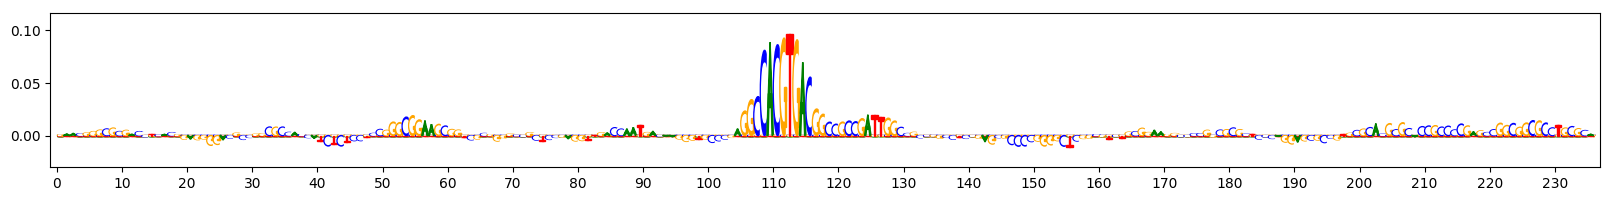

Normalized gkmexplain hypothetical scores


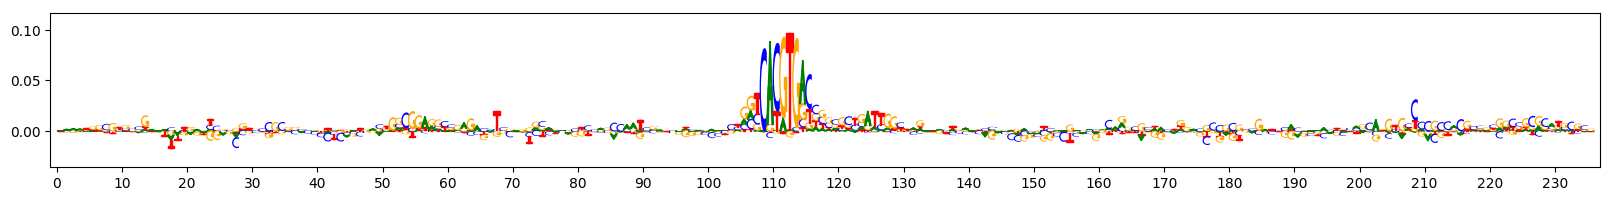

Normalized gkmexplain importance scores


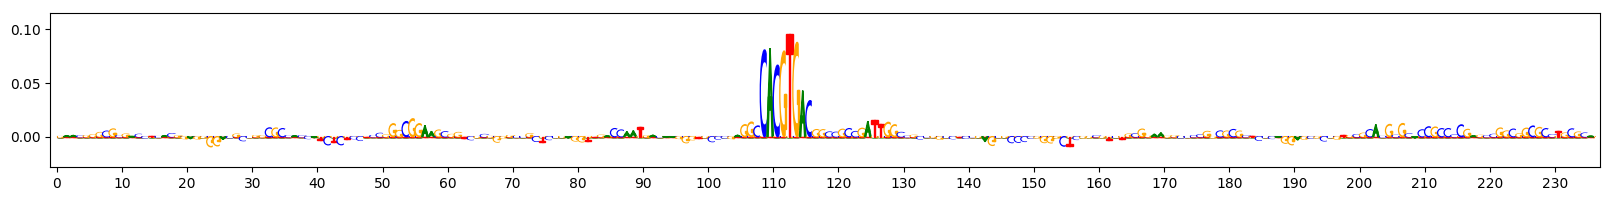

Original gkmexplain importance scores
0.49278370521000014


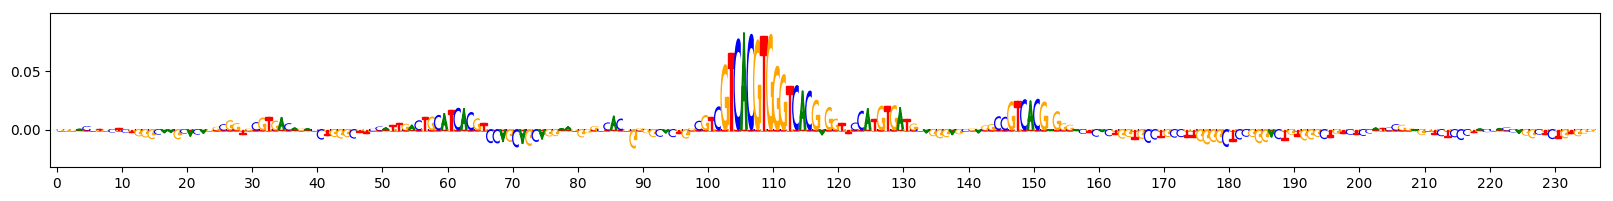

Normalized gkmexplain hypothetical scores


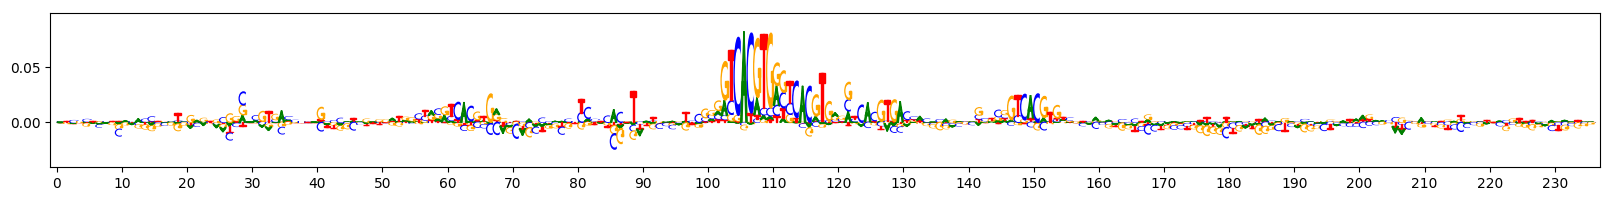

Normalized gkmexplain importance scores


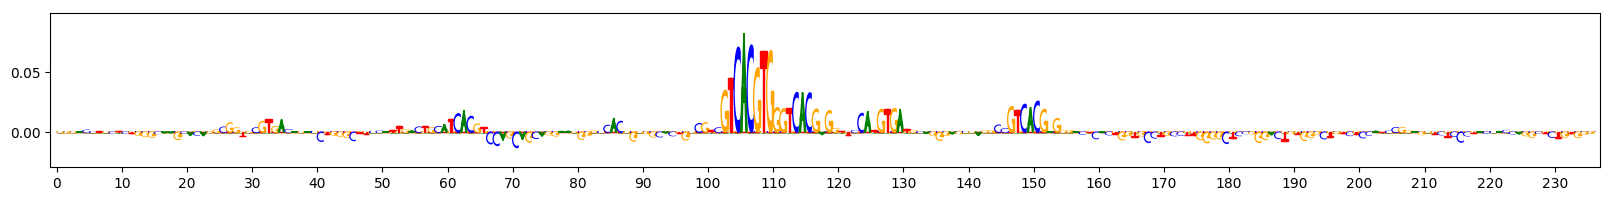

Original gkmexplain importance scores
0.36159730199999995


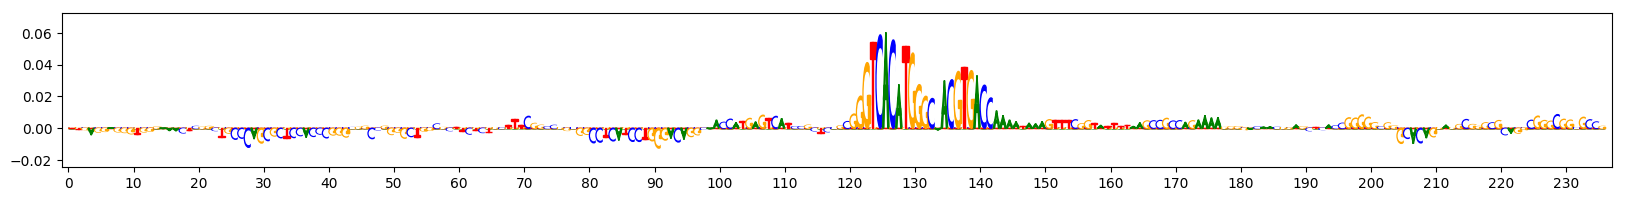

Normalized gkmexplain hypothetical scores


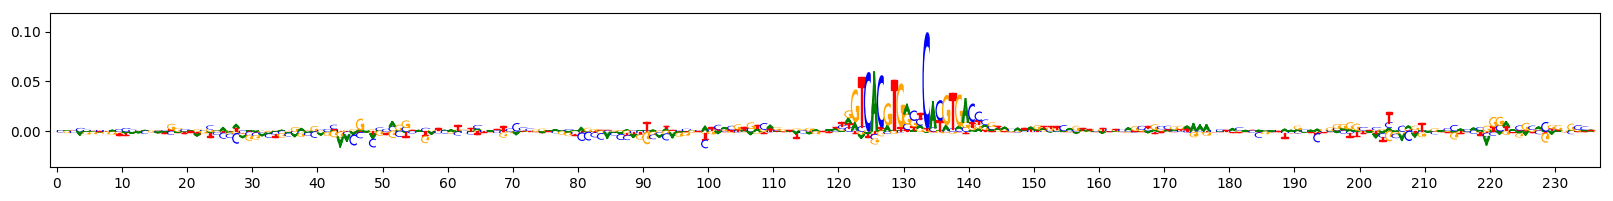

Normalized gkmexplain importance scores


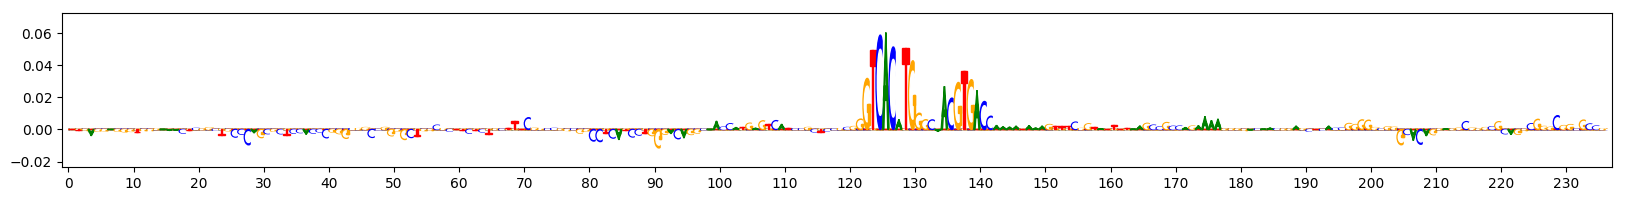

Original gkmexplain importance scores
-0.0734240638


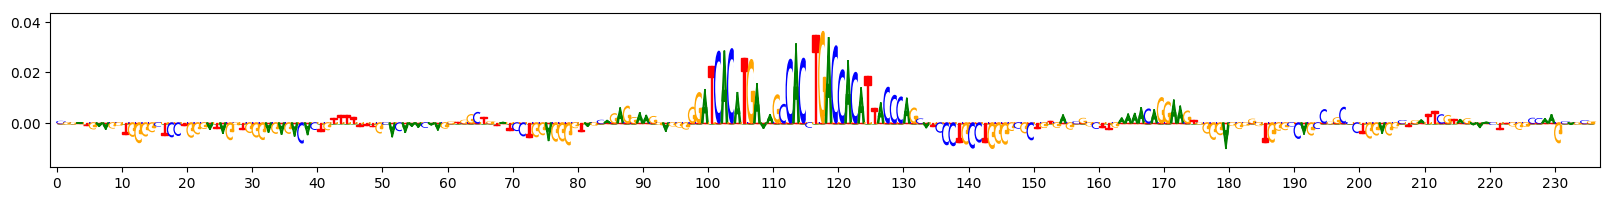

Normalized gkmexplain hypothetical scores


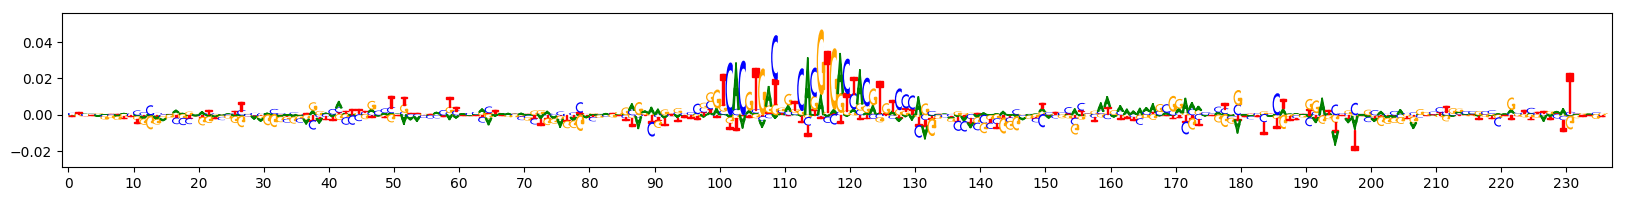

Normalized gkmexplain importance scores


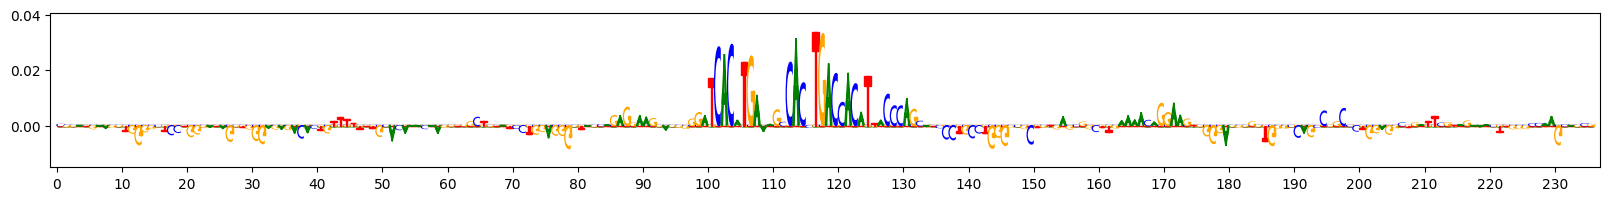

Original gkmexplain importance scores
0.8780292366999998


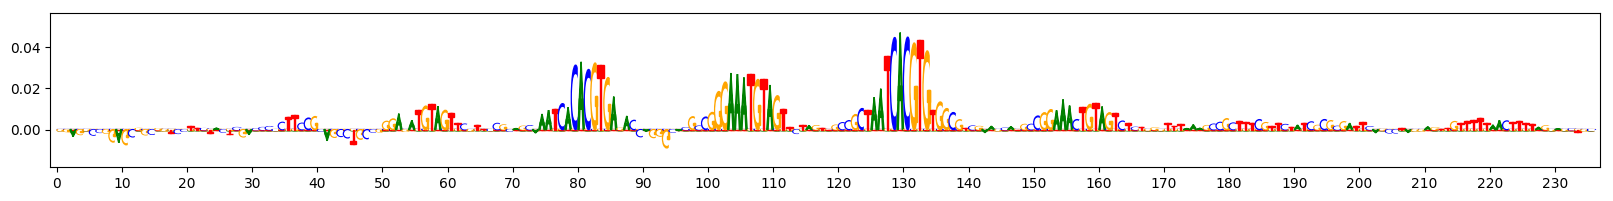

Normalized gkmexplain hypothetical scores


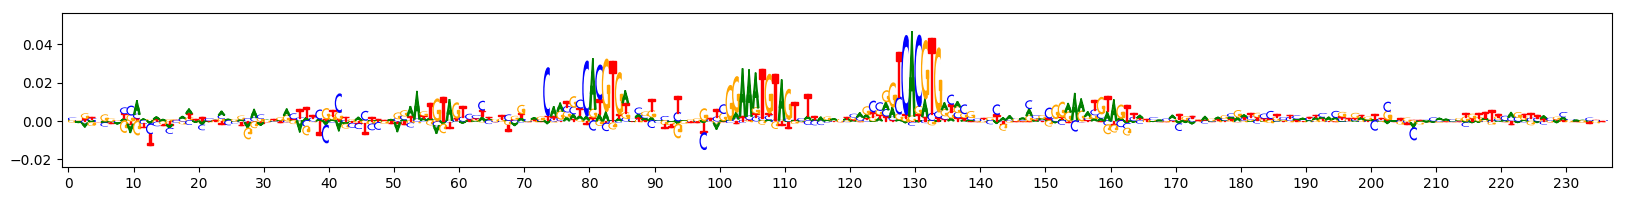

Normalized gkmexplain importance scores


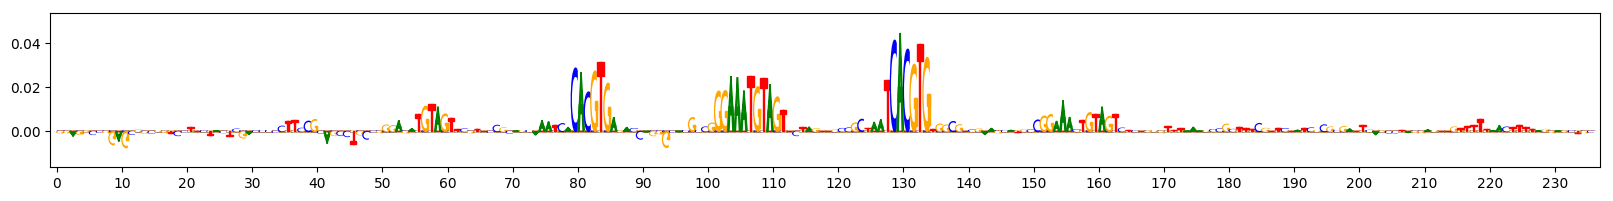

In [7]:
from modisco.visualization import viz_sequence
for i in range(5):
  print("Original gkmexplain importance scores")
  print(np.sum(impscores[i]) - 0.379216)
  viz_sequence.plot_weights(impscores[i], subticks_frequency=10)
  assert np.max(np.abs(onehot_data[i]*hypimpscores[i] - impscores[i])) == 0
  
  #normalize the hyp scores such that, at each position, hypothetical importance
  # scores that have the same sign as the original importance score all sum
  # up to the original importance score value. The rationale is that if
  # a different base at the same position could produce a score of higher
  # magnitude than the base that is actually present, then the base
  # that is actually present is relatively less important.
  #Empirically, hypothetical scores like these appear to work better for
  # motif discovery.
  imp_score_each_pos = np.sum(impscores[i],axis=-1)
  imp_score_sign_each_pos = np.sign(imp_score_each_pos)
  hyp_scores_same_sign_mask = (np.sign(hypimpscores[i])*imp_score_sign_each_pos[:,None] > 0)
  #print(hyp_scores_same_sign_mask)
  hyp_scores_same_sign_imp_scores_sum = np.sum(hypimpscores[i]*hyp_scores_same_sign_mask,axis=-1)
  norm_ratio = imp_score_each_pos/hyp_scores_same_sign_imp_scores_sum
  #print(hyp_scores_same_sign_imp_scores_sum)
  norm_hyp = hypimpscores[i]*norm_ratio[:,None]
  
  print("Normalized gkmexplain hypothetical scores")
  viz_sequence.plot_weights(norm_hyp, subticks_frequency=10)
  print("Normalized gkmexplain importance scores")
  viz_sequence.plot_weights(norm_hyp*onehot_data[i], subticks_frequency=10)

#Run TF-MoDISco on the scores

On task task0
Computing windowed sums
Computing threshold
peak(mu)= 0.0024958497907214628
Manually adjusting thresholds to get desired num seqlets
Mu: 2.495850e-03 +/- 7.520394e-07
Lablace_b: 0.01299438603446287 and 0.02708594706950686
Thresholds: -0.06921192867650794 and 0.07420362825795088
#fdrs pass: 0 and 8749
CDFs: 0.9959876012702411 and 0.9291660111970478
Est. FDRs: 1.0 and 0.04990894241328489


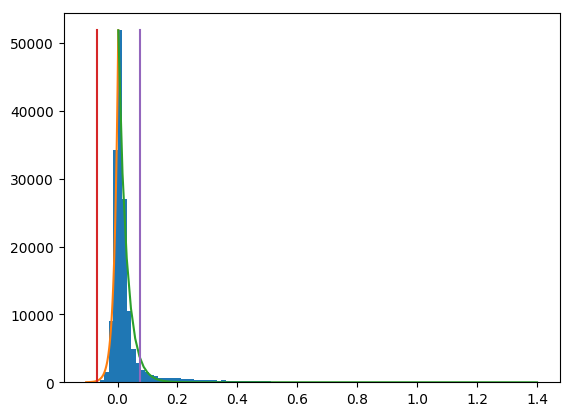

Got 1662 coords
After resolving overlaps, got 1662 seqlets
Across all tasks, the weakest laplace threshold used was: 0.9291659111970478
1662 identified in total
Reducing weak_threshold_for_counting_sign to match laplace_threshold_cdf, from 0.99 to 0.9291659111970478
1 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [1655]
Idx to activities:  {0: '1'}
On metacluster 0
Metacluster size 1655
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 1655
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings


Using TensorFlow backend.


Finished embedding computation in 1.74 s
Starting affinity matrix computations
Normalization computed in 0.07 s
Cosine similarity mat computed in 0.54 s
Normalization computed in 0.05 s
Cosine similarity mat computed in 0.52 s
Finished affinity matrix computations in 1.08 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.12 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 21.64 s
Launching nearest neighbors affmat calculation job
Job completed in: 15.32 s
(Round 1) Computed affinity matrix on nearest neighbors in 40.44 s
Filtered down to 1549 of 1655
(Round 1) Retained 1549 rows out of 1655 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1549 samples in 0.002s...
[t-SNE] Computed neighbors for 1549 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1549
[t-SNE] Computed c

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    7.1s finished


Louvain completed 200 runs in 8.68141293526 seconds
Wrote graph to binary file in 0.183481931686 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.885502
After 2 runs, maximum modularity is Q = 0.886355
Louvain completed 52 runs in 2.55703186989 seconds
Preproc + Louvain took 11.6397020817 s
Got 17 clusters after round 1
Counts:
{0: 177, 1: 145, 2: 132, 3: 128, 4: 110, 5: 103, 6: 100, 7: 99, 8: 98, 9: 83, 10: 72, 11: 67, 12: 64, 13: 62, 14: 44, 15: 42, 16: 23}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 177 seqlets
Trimmed 3 out of 177
Skipped 4 seqlets
Aggregating for cluster 1 with 145 seqlets


/usr/local/lib/python2.7/dist-packages/modisco/core.py:978: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[:,None]),
/usr/local/lib/python2.7/dist-packages/modisco/core.py:980: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[::-1,None]),


Trimmed 1 out of 145
Skipped 4 seqlets
Aggregating for cluster 2 with 132 seqlets
Trimmed 5 out of 132
Skipped 1 seqlets
Aggregating for cluster 3 with 128 seqlets
Trimmed 17 out of 128
Skipped 2 seqlets
Aggregating for cluster 4 with 110 seqlets
Trimmed 6 out of 110
Skipped 12 seqlets
Aggregating for cluster 5 with 103 seqlets
Trimmed 3 out of 103
Skipped 1 seqlets
Aggregating for cluster 6 with 100 seqlets
Trimmed 3 out of 100
Skipped 3 seqlets
Aggregating for cluster 7 with 99 seqlets
Trimmed 3 out of 99
Skipped 1 seqlets
Aggregating for cluster 8 with 98 seqlets
Trimmed 2 out of 98
Aggregating for cluster 9 with 83 seqlets
Trimmed 13 out of 83
Aggregating for cluster 10 with 72 seqlets
Trimmed 1 out of 72
Skipped 2 seqlets
Aggregating for cluster 11 with 67 seqlets
Trimmed 3 out of 67
Aggregating for cluster 12 with 64 seqlets
Trimmed 0 out of 64
Skipped 1 seqlets
Aggregating for cluster 13 with 62 seqlets
Trimmed 0 out of 62
Skipped 1 seqlets
Aggregating for cluster 14 with 44 seq

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    6.9s finished


Louvain completed 200 runs in 8.55489611626 seconds
Wrote graph to binary file in 0.273093938828 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.769124
After 3 runs, maximum modularity is Q = 0.789506
After 9 runs, maximum modularity is Q = 0.789609
Louvain completed 59 runs in 3.79473590851 seconds
Preproc + Louvain took 12.8155829906 s
Got 13 clusters after round 2
Counts:
{0: 181, 1: 166, 2: 163, 3: 162, 4: 156, 5: 118, 6: 115, 7: 88, 8: 85, 9: 81, 10: 64, 11: 38, 12: 27}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 181 seqlets
Trimmed 7 out of 181
Skipped 1 seqlets
Aggregating for cluster 1 with 166 seqlets
Trimmed 3 out of 166
Aggregating for cluster 2 with 163 seqlets
Trimmed 1 out of 163
Skipped 2 seqlets
Aggregating for cluster 3 with 162 seqlets
Trimmed 11 out of 162
Aggregating for cluster 4 with 156 seqlets
Trimmed 0 out of 156
Skipped 1 seqlets
Aggregating for cluster 5 with 118 seqlets
Trimmed 5 out 

In [8]:
import modisco

#normalize the hyp scores such that, at each position, hypothetical importance
# scores that have the same sign as the original importance score all sum
# up to the original importance score value. The rationale is that if
# multiple different bases at a position could produce a similar score,
# the specific identity of each individual base is less important.
#Empirically, hypothetical scores like these appear to work better for
# motif discovery. Using normalized importance scores derived by taking
# the elementwise product of the normalized hypothetical scores and
# the one-hot encoding also seems to reduce noise.
normed_hyp_scores = []
normed_impscores = []
for i in range(len(impscores)):
  imp_score_each_pos = np.sum(impscores[i],axis=-1)
  imp_score_sign_each_pos = np.sign(imp_score_each_pos)
  hyp_scores_same_sign_mask = (np.sign(hypimpscores[i])*imp_score_sign_each_pos[:,None] > 0)
  hyp_scores_same_sign_imp_scores_sum = np.sum(hypimpscores[i]*hyp_scores_same_sign_mask,axis=-1)
  norm_ratio = imp_score_each_pos/hyp_scores_same_sign_imp_scores_sum
  norm_hyp = hypimpscores[i]*norm_ratio[:,None]
  normed_hyp_scores.append(norm_hyp)
  normed_impscores.append(norm_hyp*onehot_data[i])

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                        #Note: the 'min_seqlets_per_task'
                        # parameter is only approximate; it results in
                        # min_seqlets_per_task*0.5*sliding_window_size windows
                        # being deemed as passing the threshold for each task;
                        # the actual number of seqlets may be much smaller after
                        # overlapping windows are eliminated.
                        min_seqlets_per_task=5000,
                        sliding_window_size=6,
                        flank_size=4,
                        seqlets_to_patterns_factory=modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        trim_to_window_size=10,
                        initial_flank_to_add=5,
                        kmer_len=6, num_gaps=1,
                        num_mismatches=0,
                        #min_num_to_trim_to and final_min_cluster_size affect
                        # the minimum support of the final motifs. See
                        # https://github.com/kundajelab/tfmodisco/ for
                        # more details.
                        min_num_to_trim_to=10,
                        final_min_cluster_size=10),
                   )(
                task_names=["task0"],
                contrib_scores={'task0': normed_impscores},
                #normalize the hypothetical scores to have a mean of 0 at each
                # position, for ease of visualization
                hypothetical_contribs={'task0': normed_hyp_scores},
                one_hot=onehot_data)

Motif number 1
num seqlets 1028
fwd
Information-content-scaled base frequencies


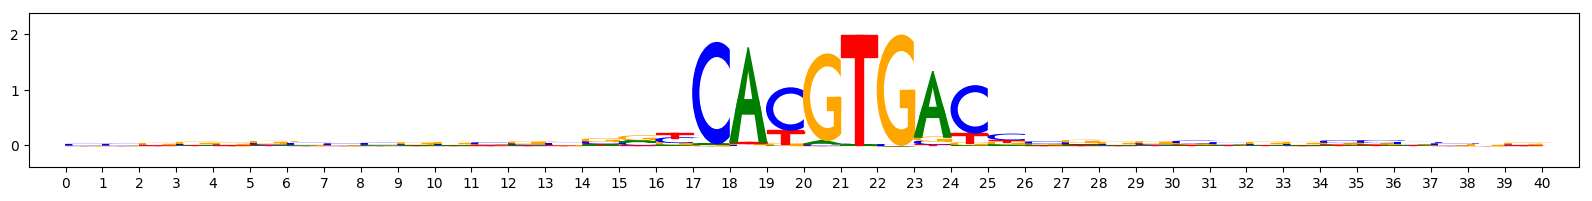

Averaged importance scores


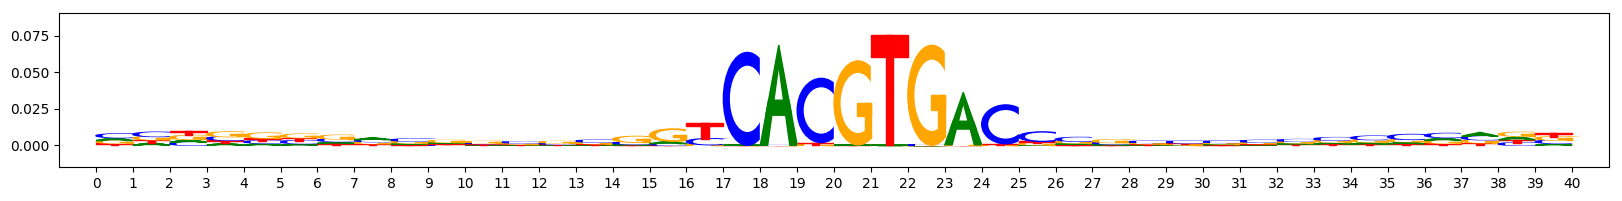

Averaged hypothetical importance scores


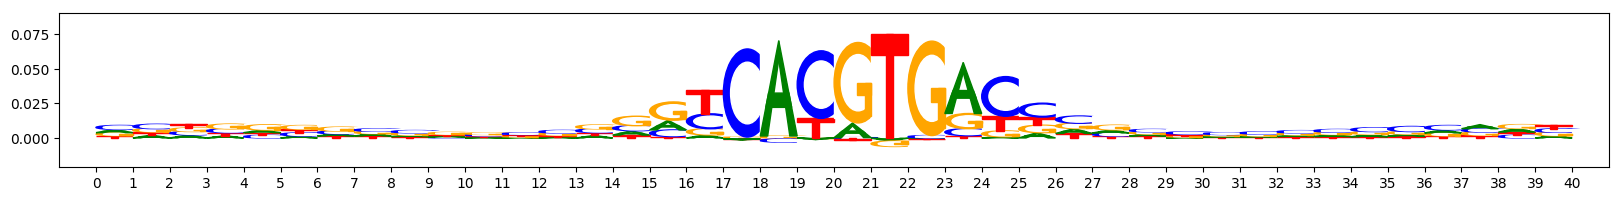

rev
Information-content-scaled base frequencies


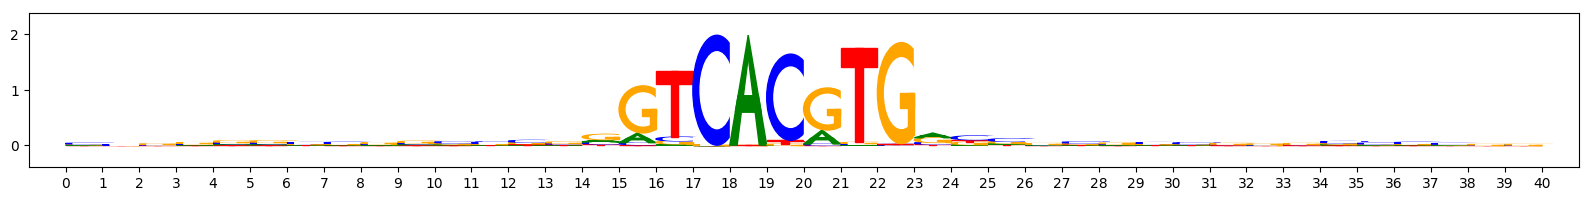

Averaged importance scores


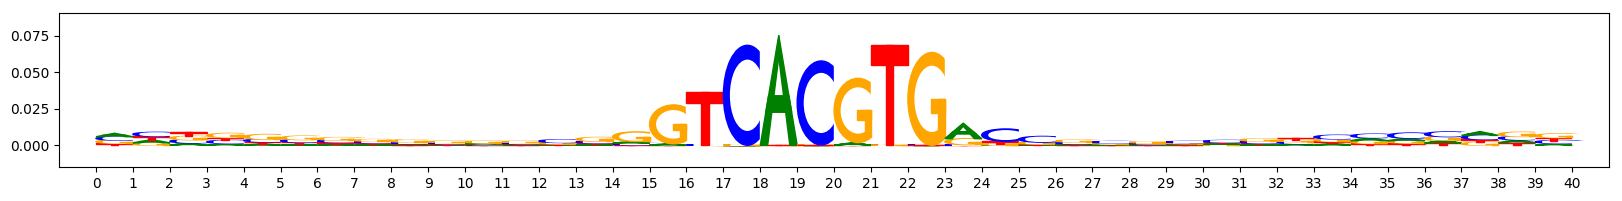

Averaged hypothetical importance scores


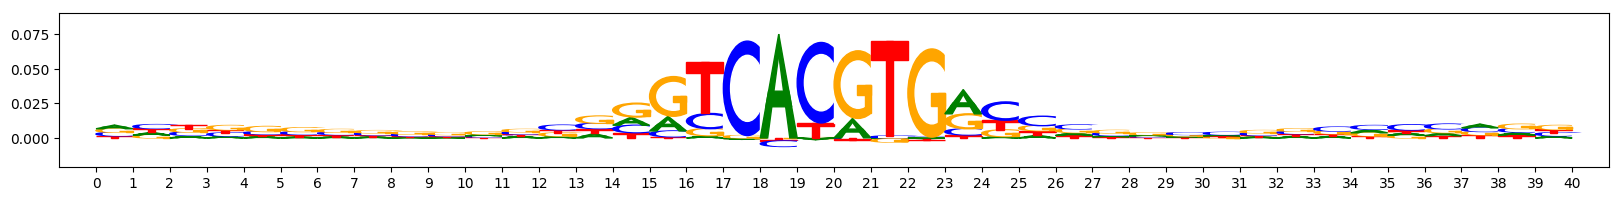

Motif number 2
num seqlets 153
fwd
Information-content-scaled base frequencies


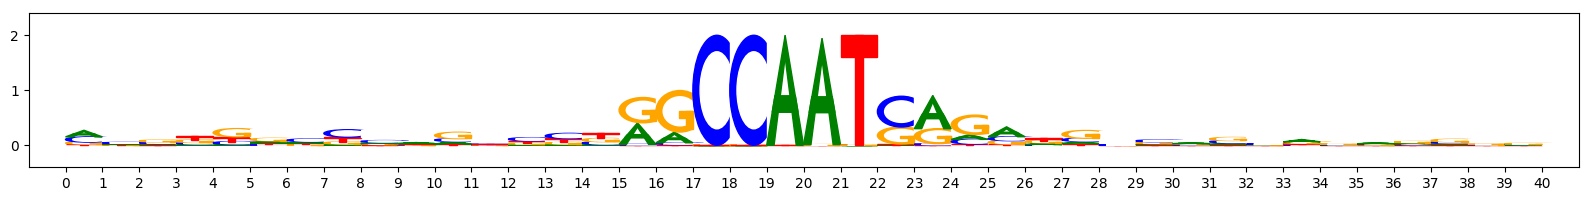

Averaged importance scores


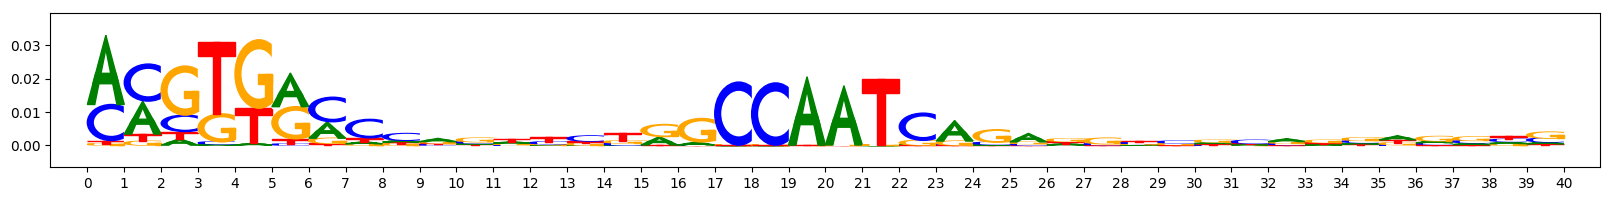

Averaged hypothetical importance scores


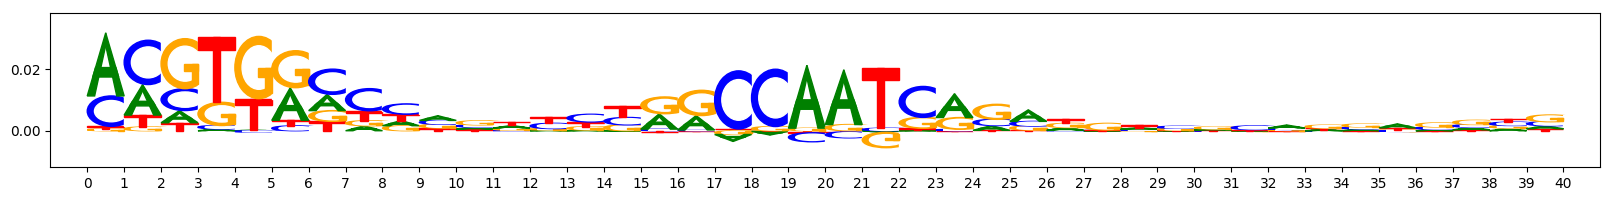

rev
Information-content-scaled base frequencies


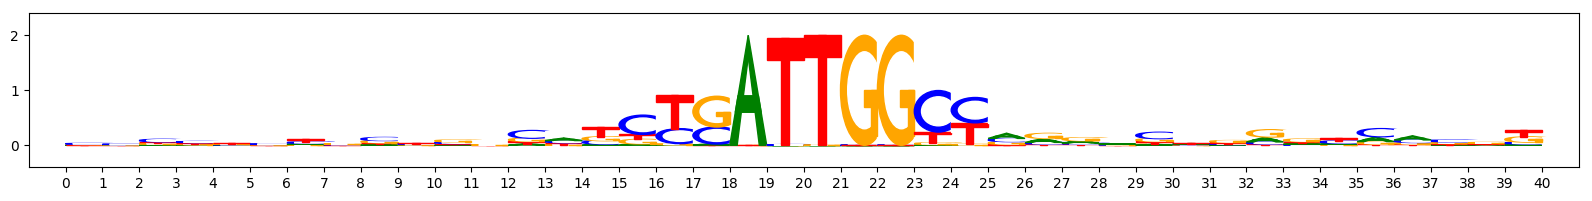

Averaged importance scores


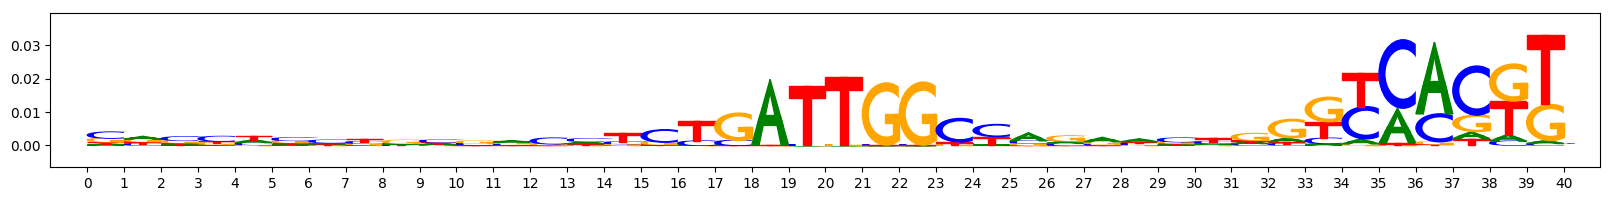

Averaged hypothetical importance scores


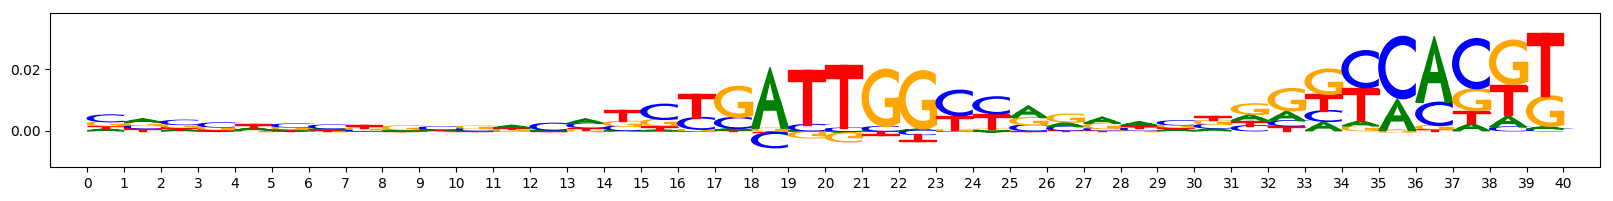

Motif number 3
num seqlets 77
fwd
Information-content-scaled base frequencies


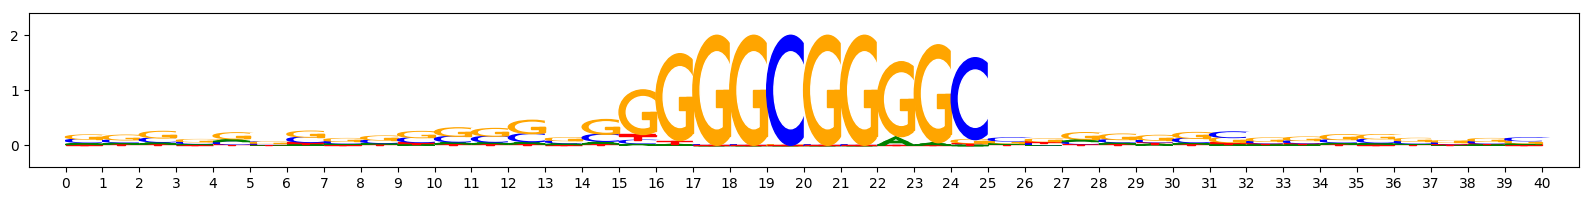

Averaged importance scores


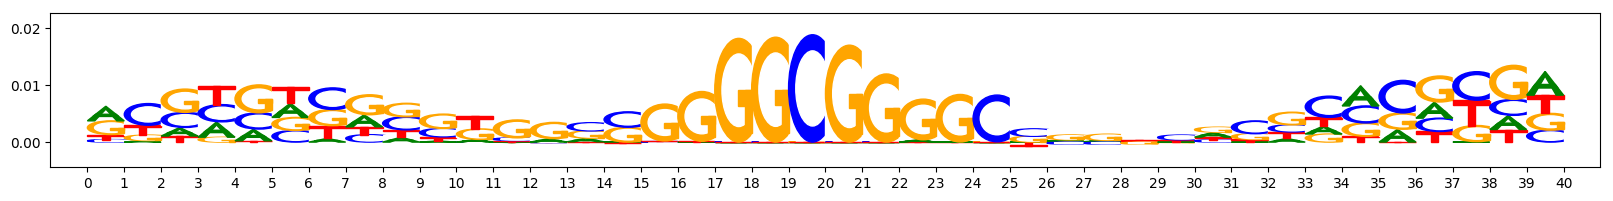

Averaged hypothetical importance scores


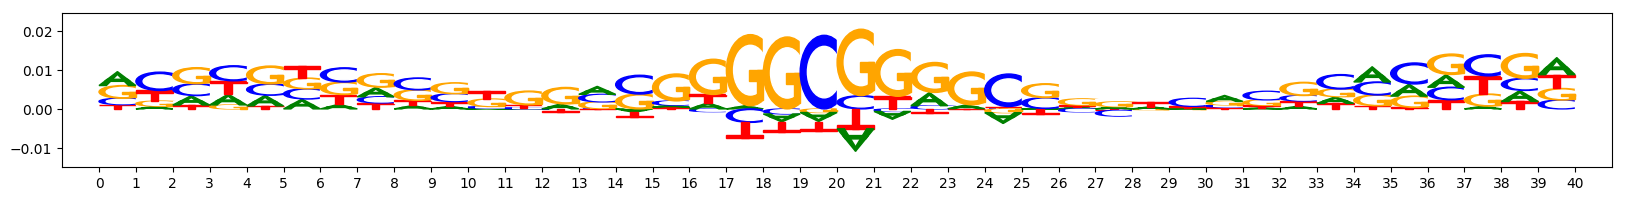

rev
Information-content-scaled base frequencies


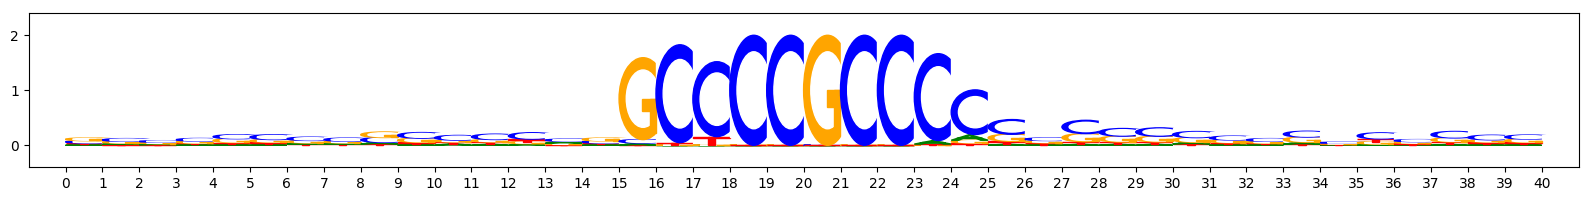

Averaged importance scores


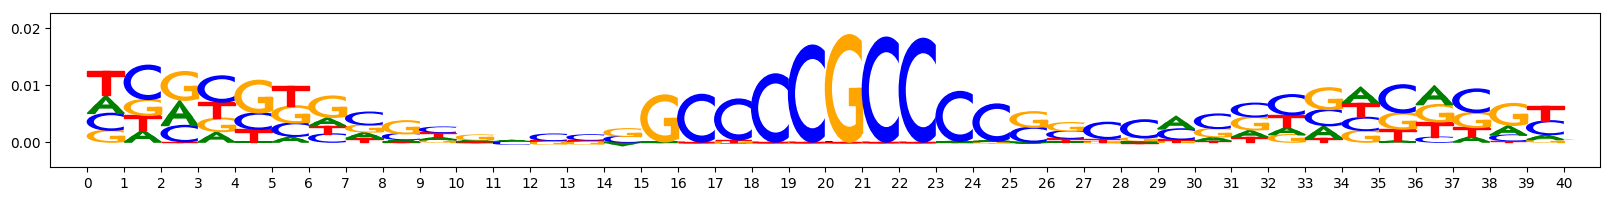

Averaged hypothetical importance scores


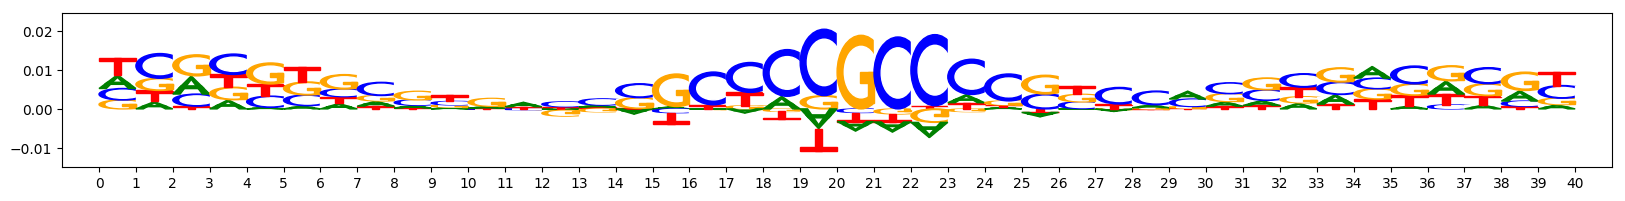

Motif number 4
num seqlets 62
fwd
Information-content-scaled base frequencies


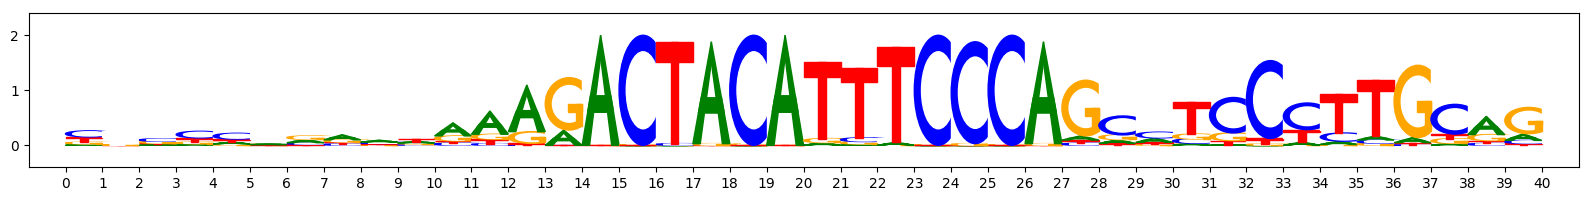

Averaged importance scores


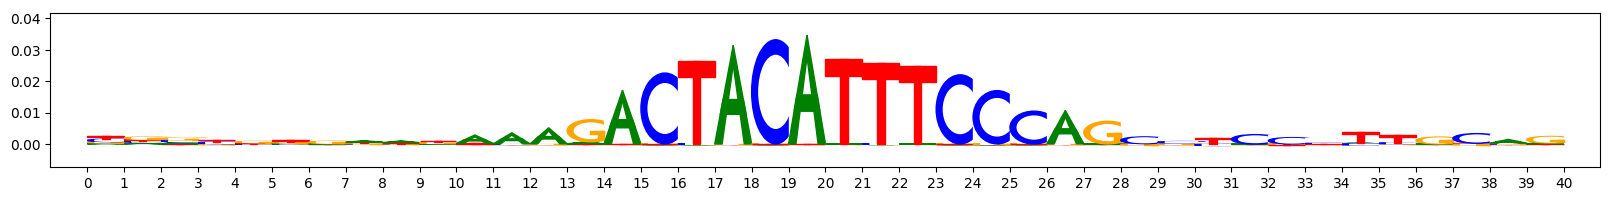

Averaged hypothetical importance scores


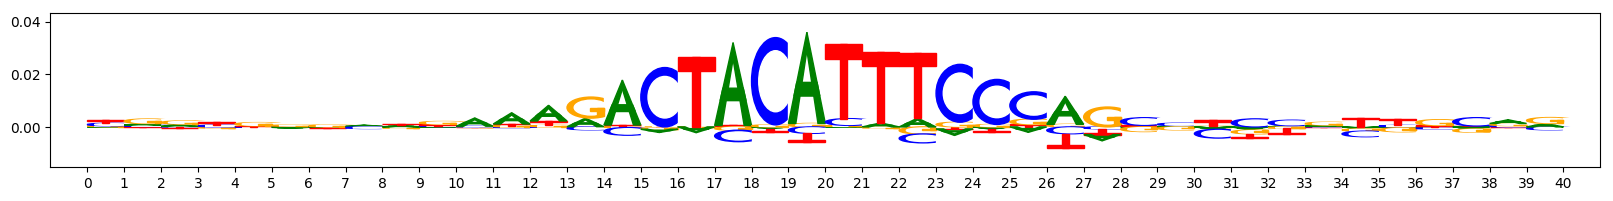

rev
Information-content-scaled base frequencies


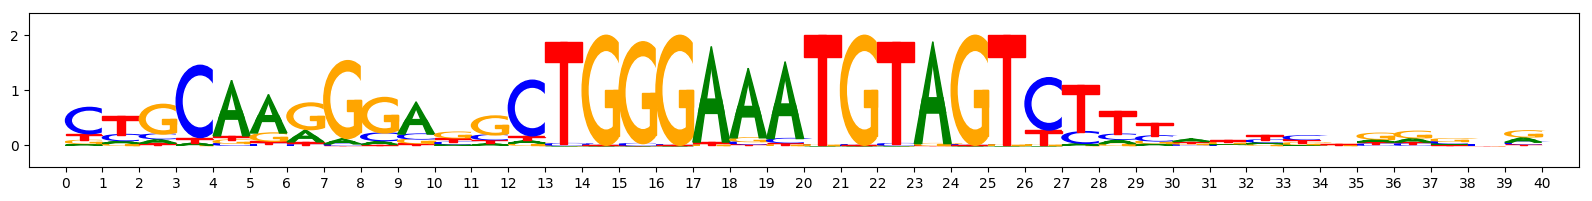

Averaged importance scores


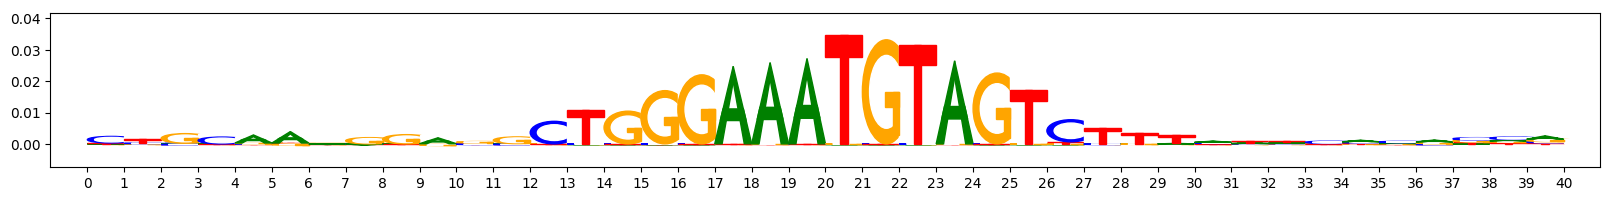

Averaged hypothetical importance scores


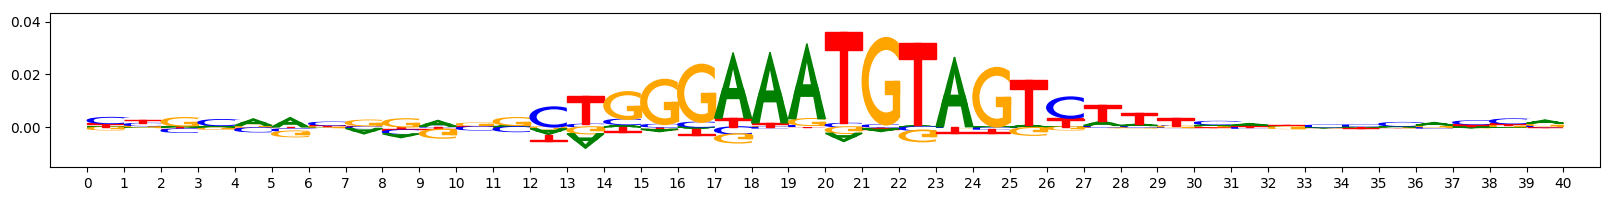

Motif number 5
num seqlets 32
fwd
Information-content-scaled base frequencies


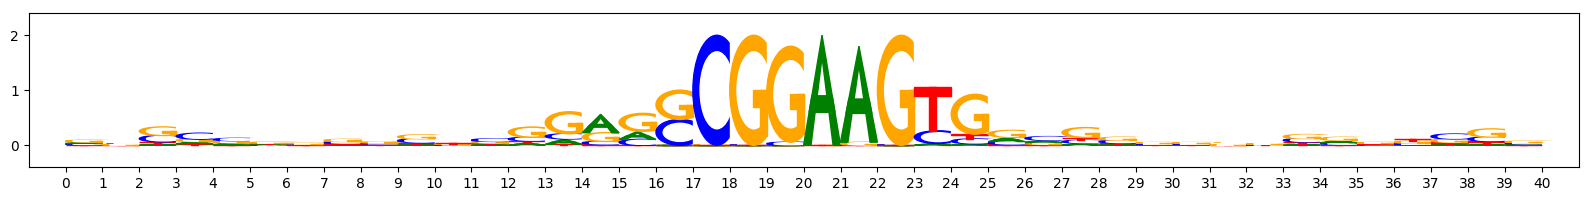

Averaged importance scores


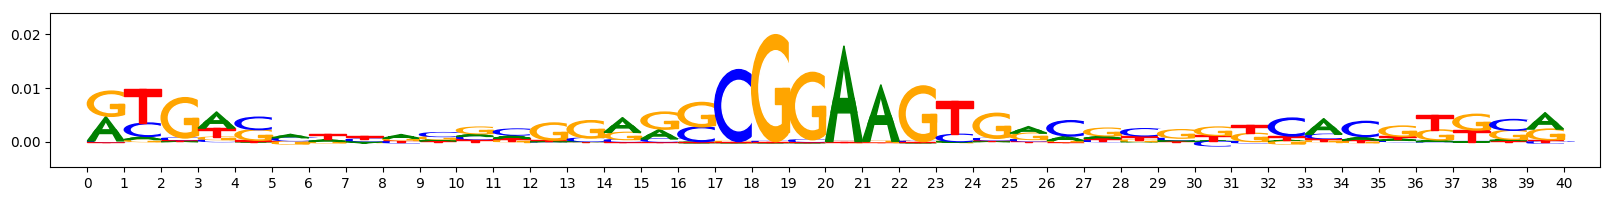

Averaged hypothetical importance scores


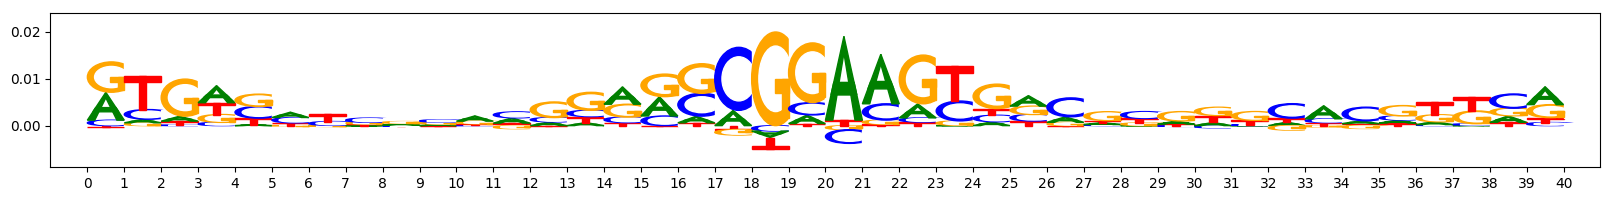

rev
Information-content-scaled base frequencies


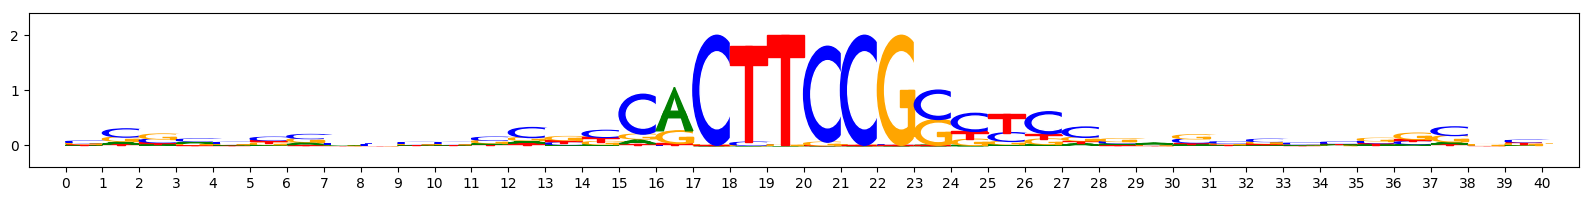

Averaged importance scores


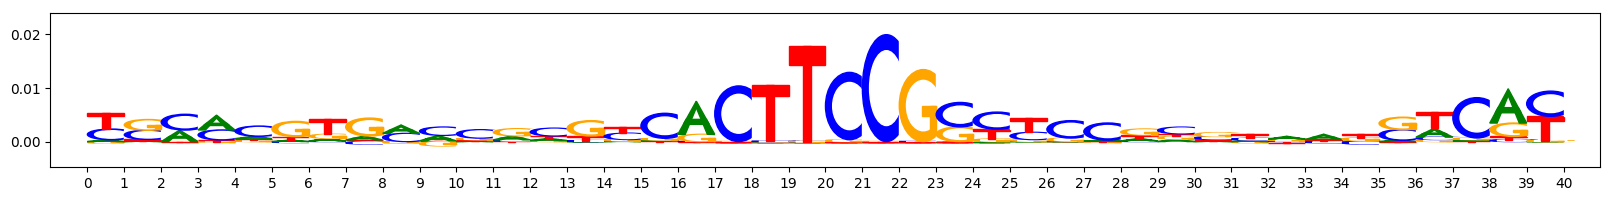

Averaged hypothetical importance scores


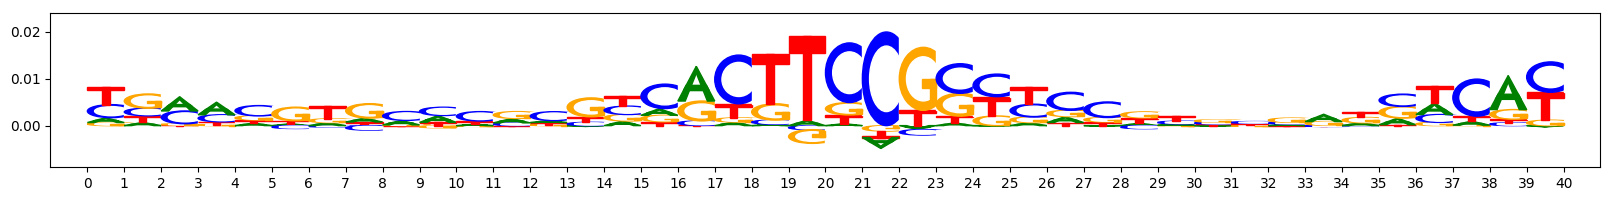

In [9]:
for i,pattern in enumerate(tfmodisco_results.
                           metacluster_idx_to_submetacluster_results[0].
                           seqlets_to_patterns_result.patterns):
  print("Motif number",i+1)
  print("num seqlets",len(pattern.seqlets))
  print("fwd")
  print("Information-content-scaled base frequencies")
  viz_sequence.plot_weights(viz_sequence.ic_scale(
                              pattern["sequence"].fwd,
                              np.array([0.25, 0.25, 0.25, 0.25])))
  print("Averaged importance scores")
  viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
  print("Averaged hypothetical importance scores")
  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)
  print("rev")
  print("Information-content-scaled base frequencies")
  viz_sequence.plot_weights(viz_sequence.ic_scale(
                              pattern["sequence"].rev,
                              np.array([0.25, 0.25, 0.25, 0.25])))
  print("Averaged importance scores")
  viz_sequence.plot_weights(pattern["task0_contrib_scores"].rev)
  print("Averaged hypothetical importance scores")
  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].rev)

# Compare to PWM discovery method in Gandhi et al. (2014)

[Gandhi et al.](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003711) describe the following method to learn a PWM from a SVM:

We developed a new method for building de novo PWMs by systematically merging the most predictive k-mers from a trained gkm-SVM. We first determined a set of predictive k-mers by scoring all possible 10-mers and selecting the top 1% of the high-scoring 10-mers. We then found a set of distinct PWM models from these predictive 10-mers using a heuristic iterated greedy algorithm. Specifically, we first built an initial PWM model from the highest scoring 10-mer. Then, for each of the remaining predictive 10-mers, we calculated the log-odd ratios of all possible alignments of the 10-mer to the PWM model, and identified the best alignment (i.e. the position and the orientation that give rise to the highest log-odd ratio value). Since multiple distinct classes of TFBSs are expected to be identified in most cases, we only considered 10-mers with good alignments (i.e. we used threshold of 5.0 for log-odd ratio scores relative to a genomic GC = 0.42 background). After each of the 10-mers was aligned, we updated the PWM model only with successfully aligned 10-mers. To further refine the PWM, we repeated this by iterating through all of the top 1% 10-mers until no changes were made. When updating the PWM model, we assumed that the contribution of each k-mer is exponentially weighted proportional to its SVM score, using exp(α wi), with α = 3.0. The 10-mers used for creating the 1st PWM were then removed from the list, and the process was repeated on the remaining predictive k-mers, to find up to three PWMs. Lastly, we matched our PWMs to the previously identified PWMs [18] using TOMTOM [36] software. Each of the PWMs identified by our method were associated with Ref. [18] PWMs if the q-value (false discovery rate) <0.05.

The code for this can be downloaded from the [gkmsvm website](http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz), which we have done here

In [10]:
!wget http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz
!tar -xzf gkmsvm-2.0.tar.gz

--2019-01-13 22:10:24--  http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz
Resolving www.beerlab.org (www.beerlab.org)... 23.229.186.73
Connecting to www.beerlab.org (www.beerlab.org)|23.229.186.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2936492 (2.8M) [application/x-gzip]
Saving to: ‘gkmsvm-2.0.tar.gz’

gkmsvm-2.0.tar.gz   100%[===================>]   2.80M  2.78MB/s    in 1.0s    

2019-01-13 22:10:25 (2.78 MB/s) - ‘gkmsvm-2.0.tar.gz’ saved [2936492/2936492]



In [0]:
#Generate all possible non-redundant 10-mers
!python gkmsvm/scripts/nrkmers.py 10 nrkmers.fa

In [0]:
#score the non-redundant kmers using the model
!lsgkm/src/gkmpredict nrkmers.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt nrkmers_scores.txt -v 1

In [13]:
#generate the PWMs using the provided script with default settings
# it was unclear to us what to set for PWM_LENGTH based on the description
# of the algorithm in Gandhi et al., so we set it to 20, which seems like
# a reasonable upper limit for motifs derived by aligning 10-mers
!python gkmsvm/scripts/svmw_emalign.py nrkmers_scores.txt 19 gandhietalpwms

INFO  @ Sun, 13 Jan 2019 22:11:38: seed kmer: GGTCACGTGA 
INFO  @ Sun, 13 Jan 2019 22:11:38: round - 0/100 
INFO  @ Sun, 13 Jan 2019 22:11:39: obj: 24064.218720 
INFO  @ Sun, 13 Jan 2019 22:11:39: round - 1/100 
INFO  @ Sun, 13 Jan 2019 22:11:40: obj: 72214.011281 
INFO  @ Sun, 13 Jan 2019 22:11:40: round - 2/100 
INFO  @ Sun, 13 Jan 2019 22:11:42: obj: 77455.458079 
INFO  @ Sun, 13 Jan 2019 22:11:42: round - 3/100 
INFO  @ Sun, 13 Jan 2019 22:11:43: obj: 77407.000923 
INFO  @ Sun, 13 Jan 2019 22:11:43: round - 4/100 
INFO  @ Sun, 13 Jan 2019 22:11:44: obj: 77544.373047 
INFO  @ Sun, 13 Jan 2019 22:11:44: round - 5/100 
INFO  @ Sun, 13 Jan 2019 22:11:45: obj: 77538.224816 
INFO  @ Sun, 13 Jan 2019 22:11:45: round - 6/100 
INFO  @ Sun, 13 Jan 2019 22:11:46: obj: 77539.071138 
INFO  @ Sun, 13 Jan 2019 22:11:46: round - 7/100 
INFO  @ Sun, 13 Jan 2019 22:11:47: obj: 77539.065878 
INFO  @ Sun, 13 Jan 2019 22:11:47: round - 8/100 
INFO  @ Sun, 13 Jan 2019 22:11:48: obj: 77539.065878 
INFO  

The method from Gandhi et al., run with default settings, generates a single PWM

In [14]:
!pip install biopython
from Bio import motifs
records = motifs.parse(open('gandhietalpwms_models.meme'), 'minimal')
print("Number of motifs:",len(records))

    100% |████████████████████████████████| 2.2MB 6.9MB/s 
Number of motifs: 1


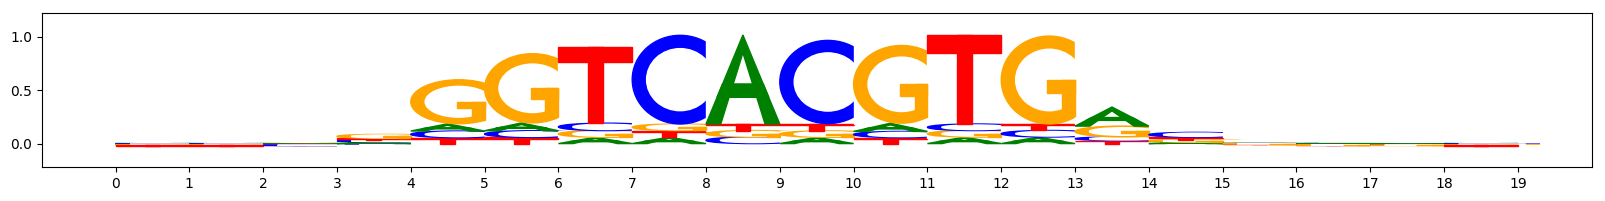

In [15]:
import numpy as np
from modisco.visualization import viz_sequence

def get_freqs_mat(meme_record):
  counts_mat = np.array([meme_record.counts[x]
                        for x in ['A', 'C', 'G', 'T']])
  normalization = np.sum(counts_mat, axis=0)
  freqs_mat = counts_mat/normalization[None,:]
  return freqs_mat.T

for meme_record in records:
  freqs_mat = get_freqs_mat(meme_record)
  viz_sequence.plot_weights(viz_sequence.ic_scale(
      pwm=freqs_mat,
      background=np.array([
          meme_record.background[x] for x in ['A', 'C', 'G', 'T']])))

# Compare to motifs from MEME

In [16]:
#download the MEME results file
!wget http://meme-suite.org/opal-jobs/appMEME_5.0.31547112228733-749196816/meme.txt

--2019-01-13 22:12:00--  http://meme-suite.org/opal-jobs/appMEME_5.0.31547112228733-749196816/meme.txt
Resolving meme-suite.org (meme-suite.org)... 54.68.135.202
Connecting to meme-suite.org (meme-suite.org)|54.68.135.202|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495412 (484K) [text/plain]
Saving to: ‘meme.txt’

meme.txt            100%[===================>] 483.80K  1.14MB/s    in 0.4s    

2019-01-13 22:12:01 (1.14 MB/s) - ‘meme.txt’ saved [495412/495412]



In [17]:
!pip install biopython
from Bio import motifs
import numpy as np

def parse_meme_file(fh):
  line = fh.readline()
  background = None
  probmats = []
  while line:
    if (line.startswith("Background letter frequencies")):
      line = fh.readline()
      _, A_prob, _, C_prob, _, G_prob, _, T_prob = line.rstrip().split(" ")
      background = np.array([float(A_prob), float(C_prob),
                             float(G_prob), float(T_prob)])  
    if (line.startswith("letter-probability matrix")):
      line = fh.readline()
      probmat = []
      while (line.startswith("---")==False):
        probmat.append([float(x) for x in line.lstrip().rstrip().split("  ")])
        line = fh.readline()
      probmats.append(np.array(probmat))
    line = fh.readline()
  return probmats, background

probmats,background = parse_meme_file(open('meme.txt'))

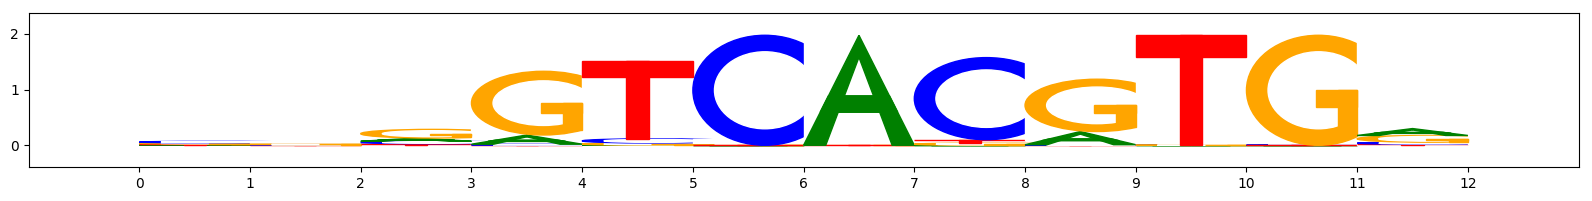

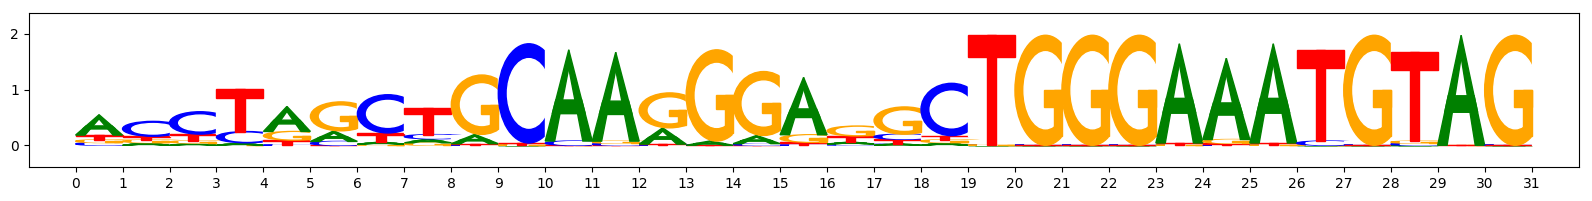

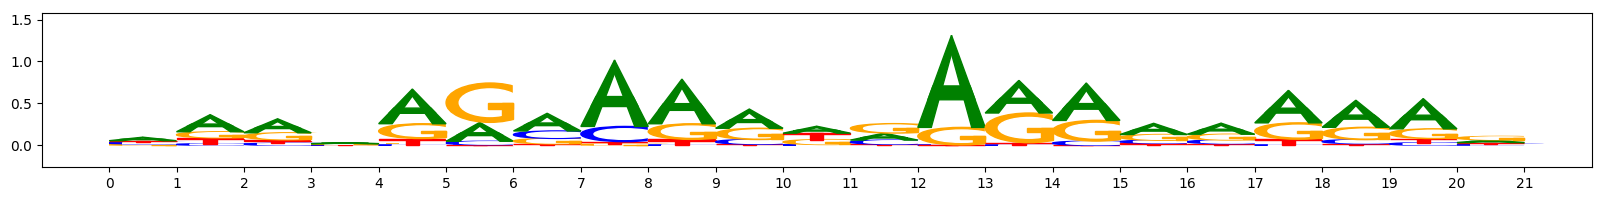

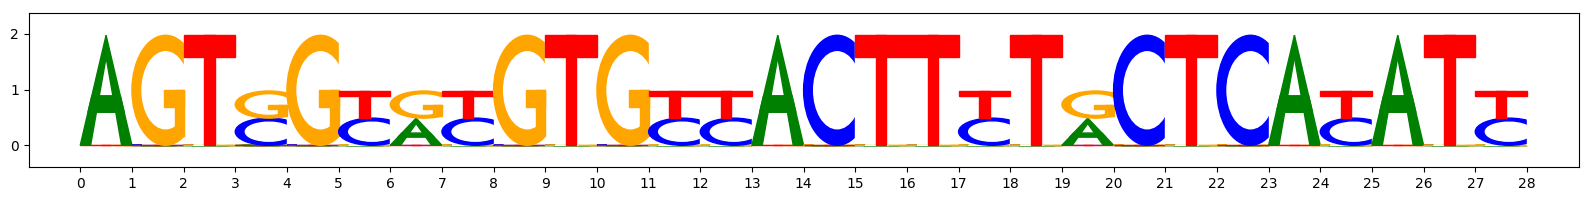

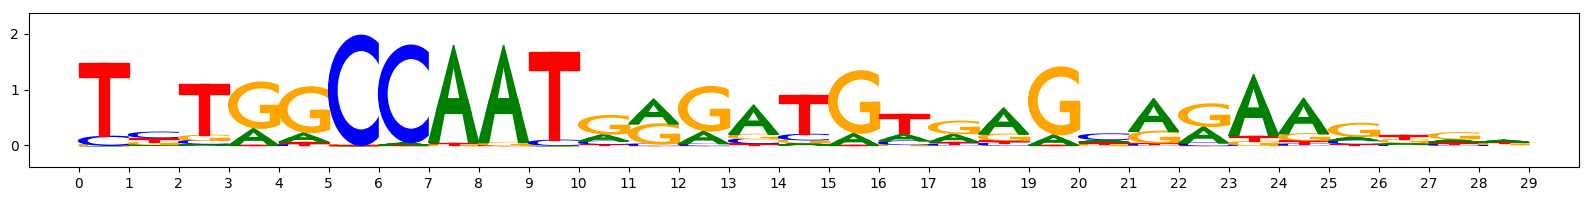

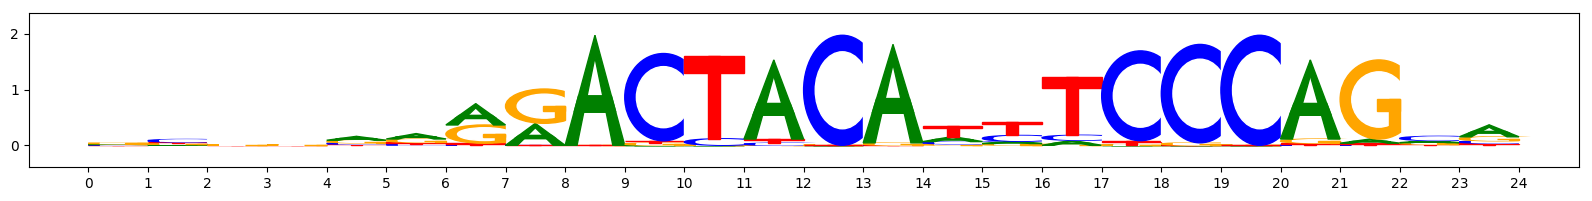

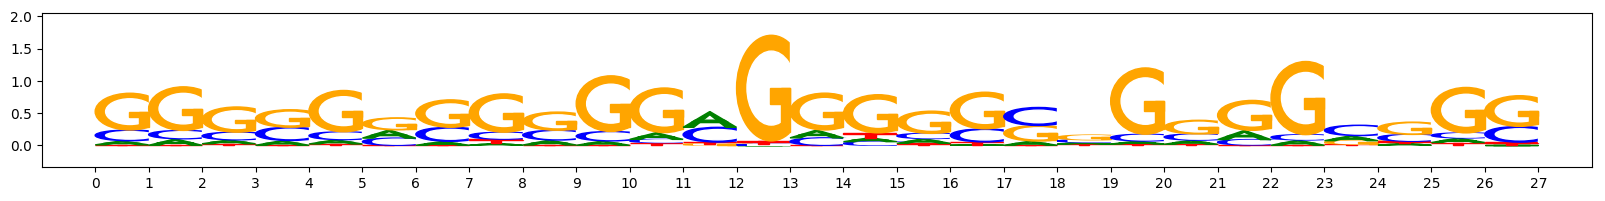

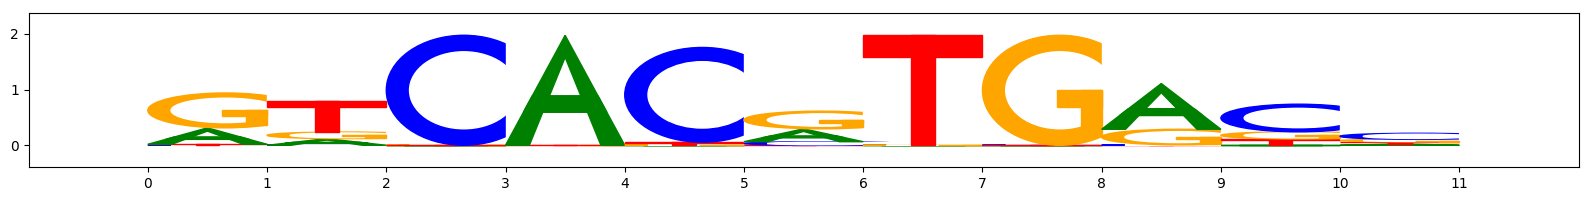

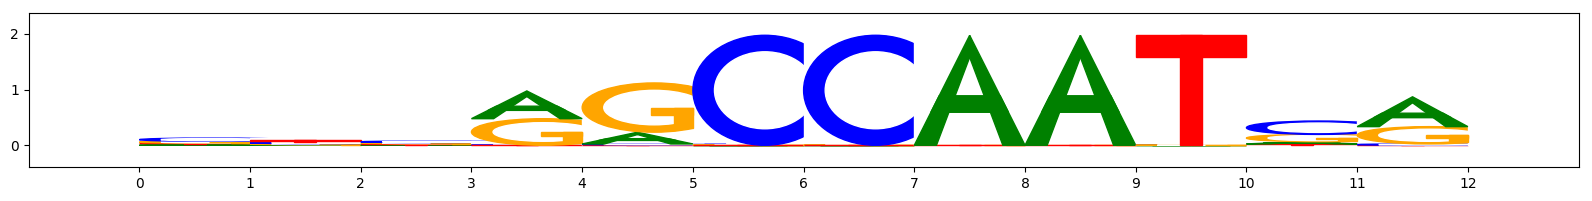

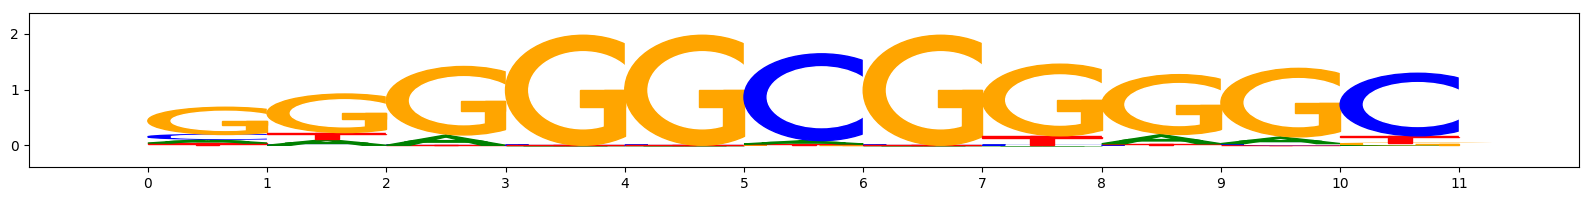

In [18]:
from modisco.visualization import viz_sequence

#plot the meme motifs
for probmat in probmats:
  viz_sequence.plot_weights(viz_sequence.ic_scale(probmat, background))

We can visualize the importance assigned to the meme motif hits at the sequence level to get a sense of how the network responded to them.

In [0]:
#scan for hits to the nfy motif
meme_motifs_logodds = [np.log((1E-7 + probmat)/background[None,:])
                       for probmat in probmats]

#rolling window for efficient rolling statistics in numpy, from
# http://www.rigtorp.se/2011/01/01/rolling-statistics-numpy.html
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
  
def do_pwm_scan(sequences, pwm):
  return [np.sum(pwm.T[:,None,:]*rolling_window(seq.T, len(pwm)),
                 axis=(0,2)) for seq in sequences]
  
meme_motif_scores = [do_pwm_scan(sequences=onehot_data, pwm=meme_motif_logodds)
                     for meme_motif_logodds in meme_motifs_logodds]

For example, below it appears that the top matches to the 7th motif in MEME are really special cases of the 10th motif

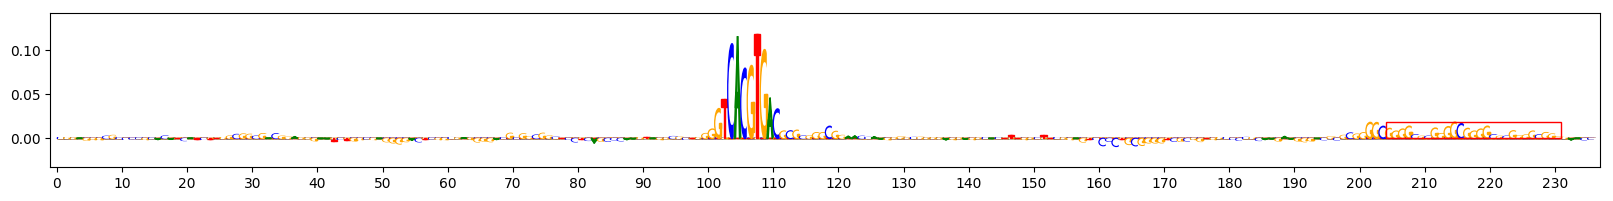

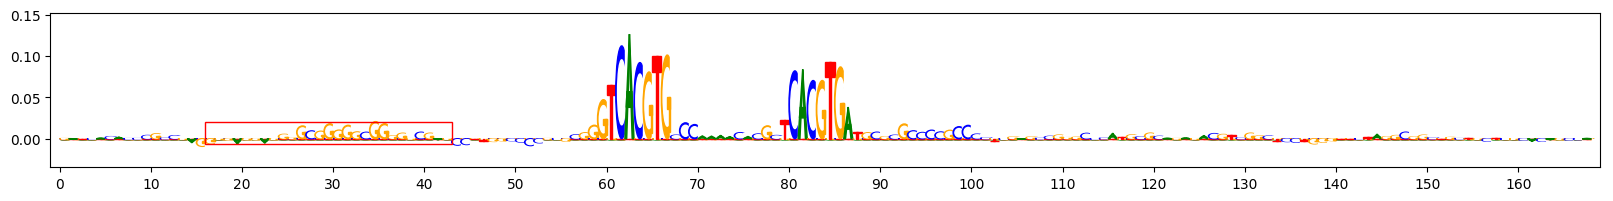

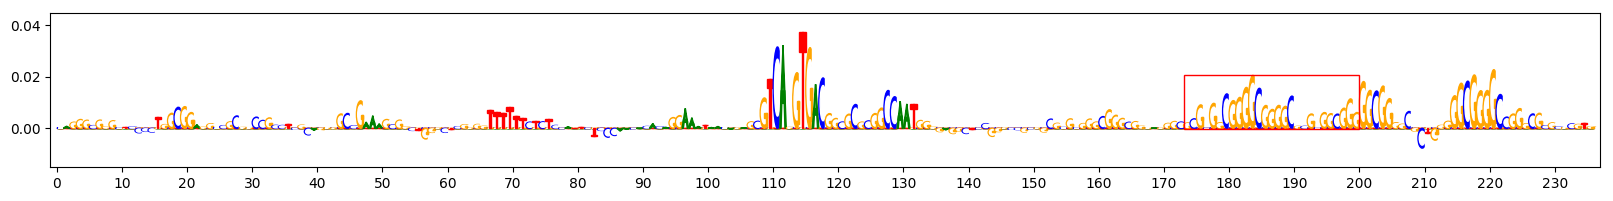

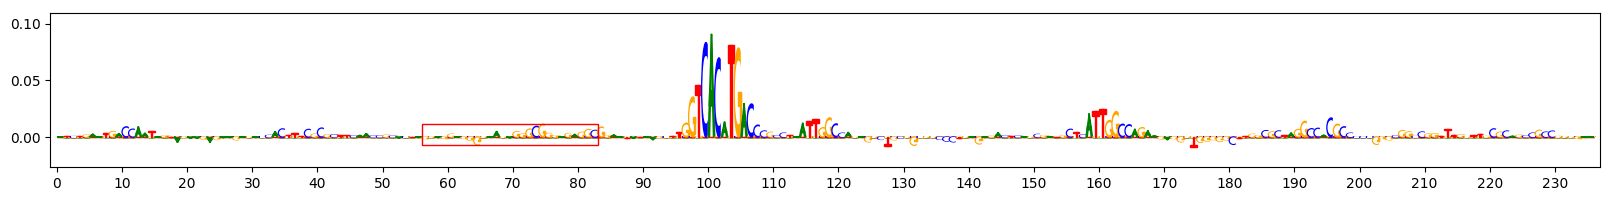

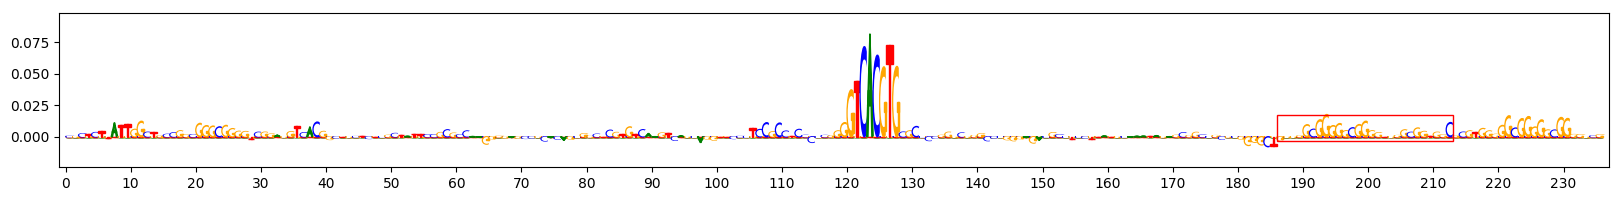

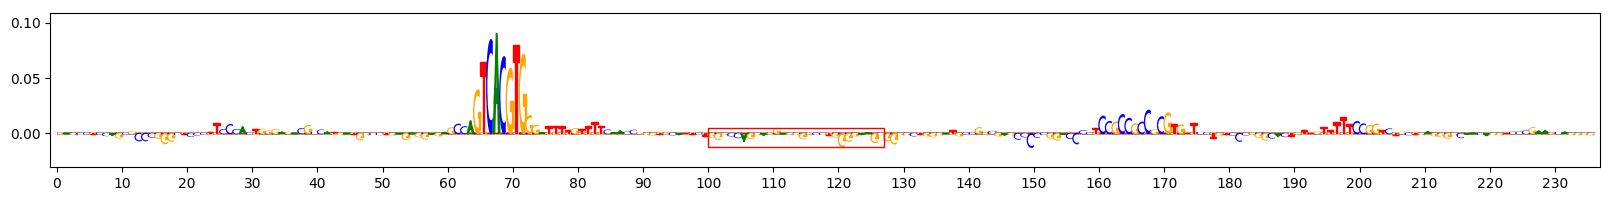

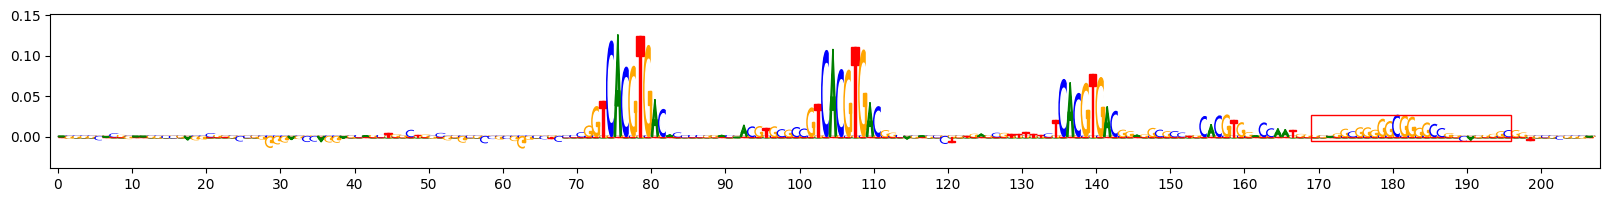

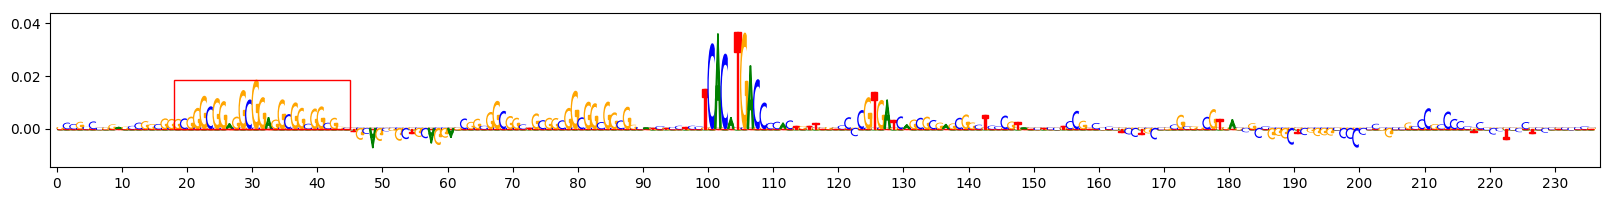

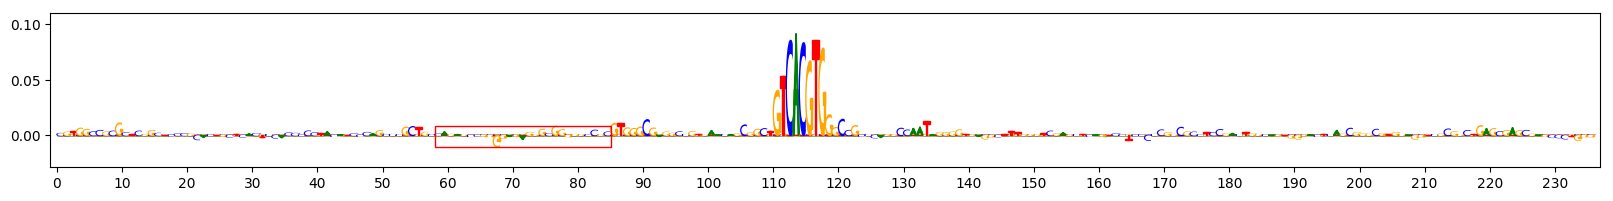

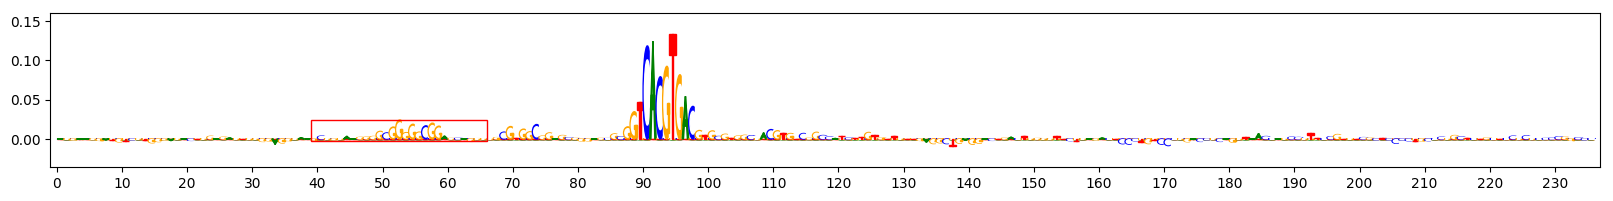

In [20]:
from modisco.visualization import viz_sequence

motif_idx_to_drill_into = 6

#sort sequences by max meme motif score
top_meme_seqindices = sorted(enumerate([
    max(x) for x in meme_motif_scores[motif_idx_to_drill_into]]),
    key=lambda x: -x[1])

for (seq_idx, max_score) in top_meme_seqindices[:10]:
  meme_scores_for_seq = meme_motif_scores[motif_idx_to_drill_into][seq_idx]
  imp_scores_for_seq = normed_impscores[seq_idx]
  motif_locs = np.nonzero(1.0*(meme_scores_for_seq >= max_score))[0]
  #print(max_score, meme_scores_for_seq[motif_locs])
  viz_sequence.plot_weights(
      array=imp_scores_for_seq,
      highlight={'red': [(loc, loc+len(meme_motifs_logodds[motif_idx_to_drill_into]))
                         for loc in motif_locs]},
      subticks_frequency=10)